In [669]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.datasets import fetch_california_housing

#load data
housing = fetch_california_housing()
print (housing.data.shape, housing.target.shape)

(20640, 8) (20640,)


In [670]:
print (housing.feature_names[0:6])

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']


In [671]:
#Split data (80-train, 20-test)
x, y = housing.data, housing.target
x_train, x_test, y_train, y_test = train_test_split(
    x,y, test_size=0.2, random_state=42)


In [672]:
#Standardize features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train) 
x_test_scaled = scaler.transform(x_test)

#Initialize and train SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(x_train_scaled, y_train)

#Make predictions
y_pred = sgd_reg.predict(x_test_scaled)

#Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")



Mean Squared Error: 0.5506
R^2 Score: 0.5798


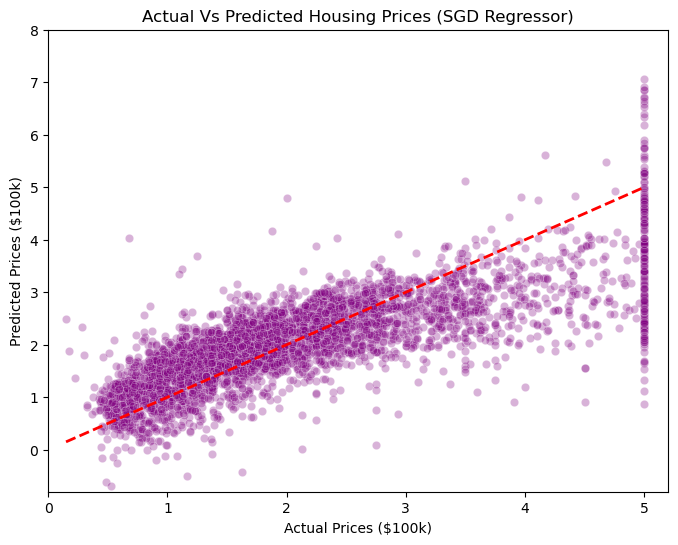

In [673]:
#Visualize actual vs. predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.3, color='Purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Prices ($100k)")
plt.ylabel("Predicted Prices ($100k)")
plt.title("Actual Vs Predicted Housing Prices (SGD Regressor)")
plt.xlim(0, 5.2)
plt.ylim(-0.8, 8)
plt.show()

In [674]:
#SGD with Polynomial features
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# 1. Define the Pipeline
poly_sgd_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    #data exploded on first instance. Lowered etao and changed to adaptive learning rate
    ('sgd', SGDRegressor(max_iter=5000, learning_rate='invscaling', eta0=0.0001, random_state=42))])

# 2. Train the model
poly_sgd_pipeline.fit(x_train, y_train)

# 3. Predict and Evaluate
y_pred_poly = poly_sgd_pipeline.predict(x_test)

mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"--- Polynomial SGD Results ---")
print(f"New Mean Squared Error: {mse_poly:.4f}")
print(f"New R^2 Score: {r2_poly:.4f}")


--- Polynomial SGD Results ---
New Mean Squared Error: 0.6393
New R^2 Score: 0.5121


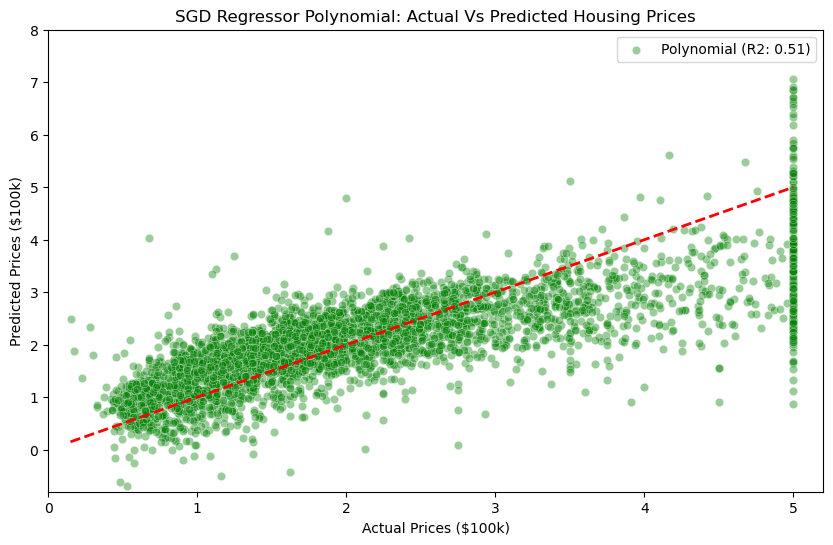

In [675]:
#Visualize actual vs. predicted
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4, label=f'Polynomial (R2: {r2_poly:.2f})', color='Green')

#prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.xlabel("Actual Prices ($100k)")
plt.ylabel("Predicted Prices ($100k)")
plt.title("SGD Regressor Polynomial: Actual Vs Predicted Housing Prices")
plt.legend()
plt.xlim(0, 5.2)
plt.ylim(-0.8, 8)
plt.show()

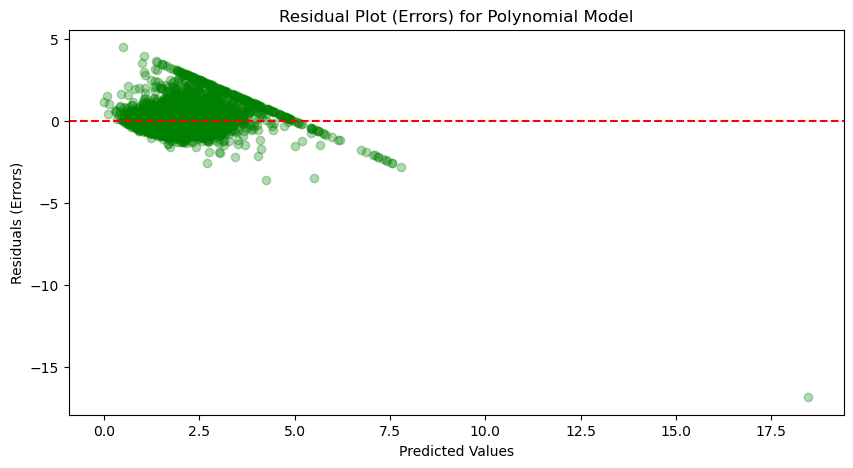

In [676]:
residuals_poly = y_test - y_pred_poly

plt.figure(figsize=(10, 5))
plt.scatter(y_pred_poly, residuals_poly, alpha=0.3, color='Green')
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot (Errors) for Polynomial Model")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Errors)")
plt.show()

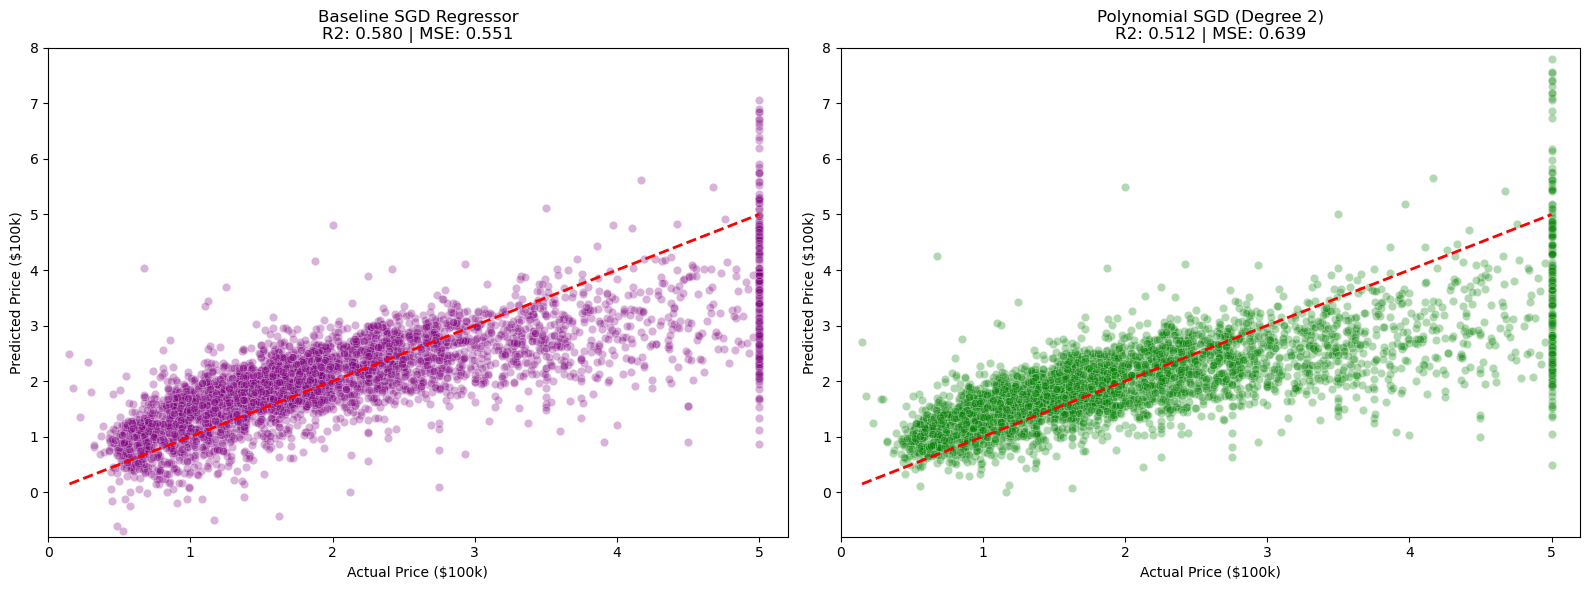

In [677]:
# Create a figure with two side-by-side plots
plt.figure(figsize=(16, 6))

# --- PLOT 1: BASELINE SGD (The Purple Plot) ---
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred, alpha=0.3, color='Purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title(f"Baseline SGD Regressor\nR2: {0.5798:.3f} | MSE: {0.5506:.3f}")
plt.xlabel("Actual Price ($100k)")
plt.ylabel("Predicted Price ($100k)")
plt.xlim(0, 5.2)
plt.ylim(-0.8, 8)

# --- PLOT 2: POLYNOMIAL SGD (The Green Plot) ---
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_poly, alpha=0.3, color='Green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title(f"Polynomial SGD (Degree 2)\nR2: {0.5121:.3f} | MSE: {0.6393:.3f}")
plt.xlabel("Actual Price ($100k)")
plt.ylabel("Predicted Price ($100k)")
plt.xlim(0, 5.2)
plt.ylim(-0.8, 8)

plt.tight_layout()
plt.show()

In [678]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
# n_estimators=100 means we are using 100 individual trees
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model (using your existing scaled training data)
rf_reg.fit(x_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [679]:
# Make predictions
y_pred_rf = rf_reg.predict(x_test_scaled)

# Calculate metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"--- Random Forest Results ---")
print(f"Mean Squared Error: {mse_rf:.4f}")
print(f"R^2 Score: {r2_rf:.4f}")

--- Random Forest Results ---
Mean Squared Error: 0.2552
R^2 Score: 0.8053


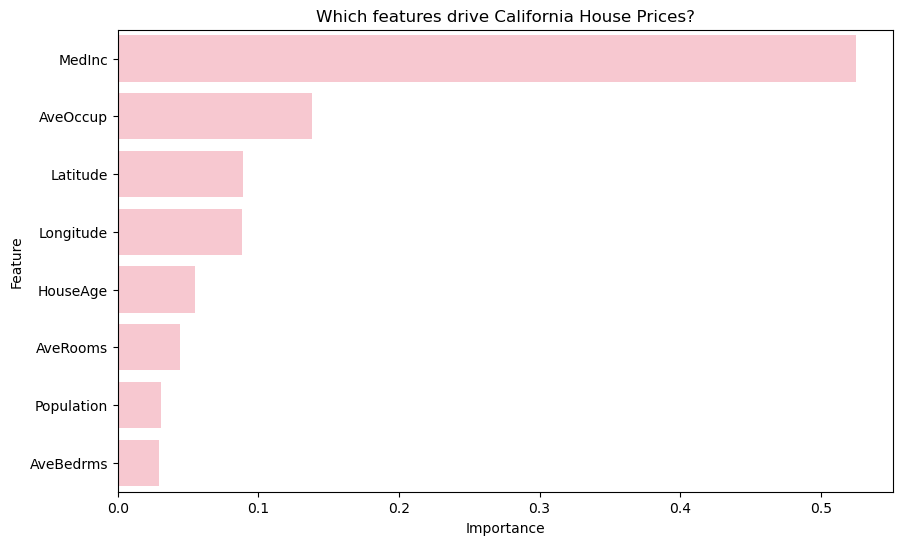

In [680]:
# Get importance levels
importances = rf_reg.feature_importances_
feature_names = housing.feature_names

# Create a small dataframe for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot it
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, color='Pink')
plt.title("Which features drive California House Prices?")
plt.show()

In [681]:
results = pd.DataFrame({
    'Model': ['Baseline SGD', 'Polynomial SGD', 'Random Forest'],
    'R2 Score': [r2, r2_poly, r2_rf] 
})
print(results)

            Model  R2 Score
0    Baseline SGD  0.579827
1  Polynomial SGD  0.512100
2   Random Forest  0.805275


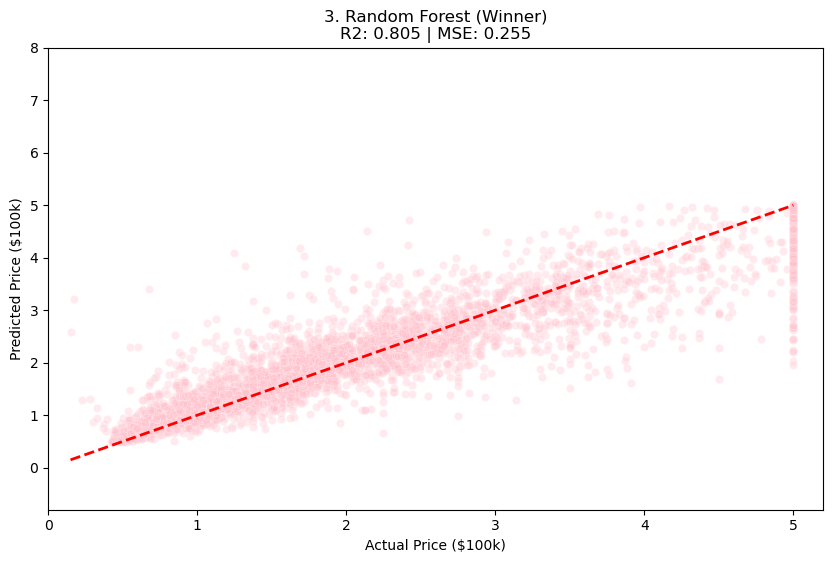

In [707]:
# RANDOM FOREST (The Pink Plot) 
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.3, color='Pink')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title(f"3. Random Forest (Winner)\nR2: 0.805 | MSE: 0.255")
plt.xlabel("Actual Price ($100k)")
plt.ylabel("Predicted Price ($100k)")
plt.xlim(0, 5.2)
plt.ylim(-0.8, 8)

plt.show()

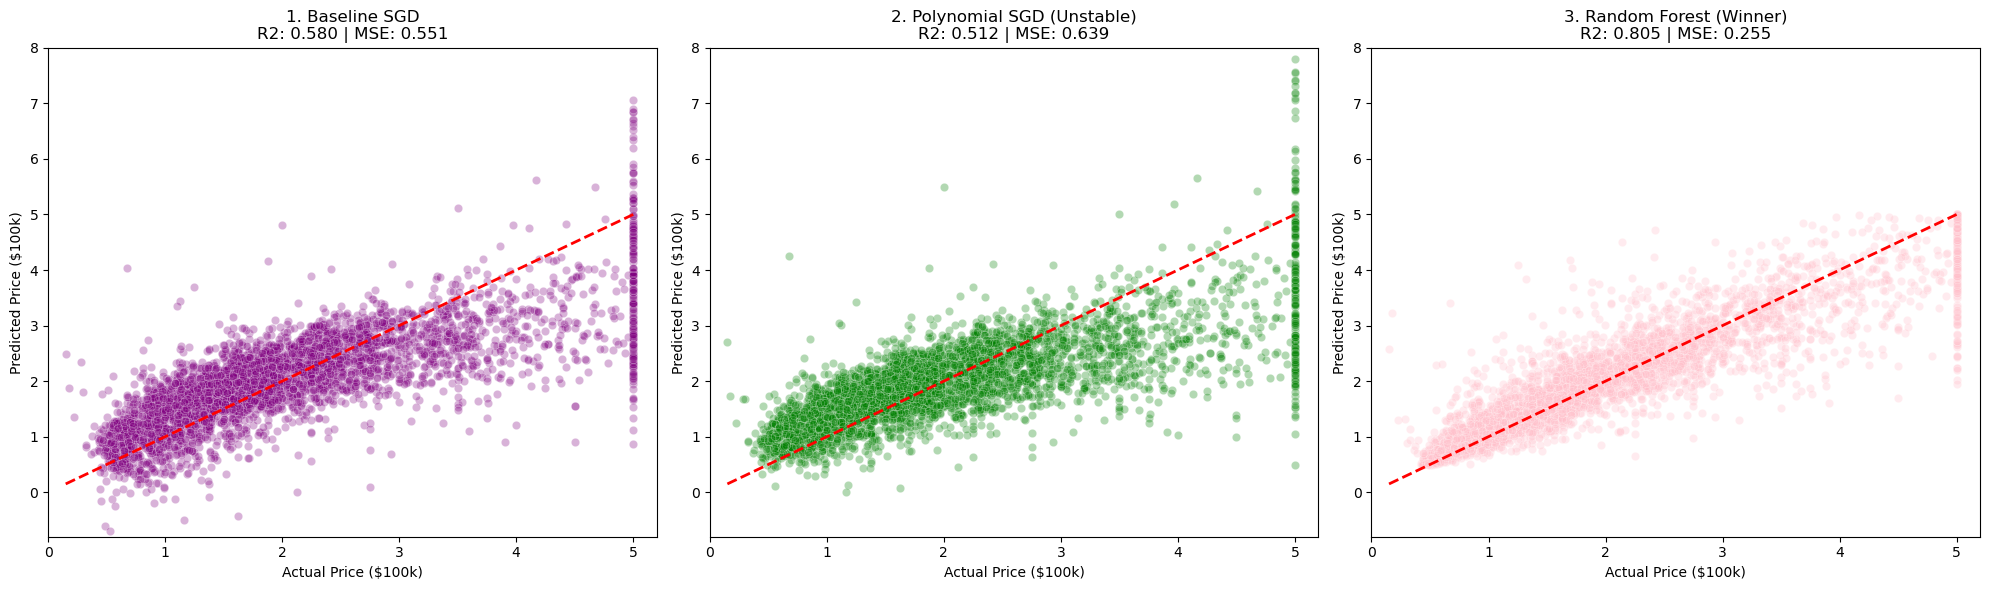

In [683]:
# Create a figure with three side-by-side plots
plt.figure(figsize=(20, 6))

# --- PLOT 1: BASELINE SGD (The Purple Plot) ---
plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test, y=y_pred, alpha=0.3, color='Purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title(f"1. Baseline SGD\nR2: 0.580 | MSE: 0.551")
plt.xlabel("Actual Price ($100k)")
plt.ylabel("Predicted Price ($100k)")
plt.xlim(0, 5.2)
plt.ylim(-0.8, 8)

# --- PLOT 2: POLYNOMIAL SGD (The Green Plot) ---
plt.subplot(1, 3, 2)
sns.scatterplot(x=y_test, y=y_pred_poly, alpha=0.3, color='Green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title(f"2. Polynomial SGD (Unstable)\nR2: 0.512 | MSE: 0.639")
plt.xlabel("Actual Price ($100k)")
plt.ylabel("Predicted Price ($100k)")
plt.xlim(0, 5.2)
plt.ylim(-0.8, 8)


# --- PLOT 3: RANDOM FOREST (The Pink Plot) ---
plt.subplot(1, 3, 3)
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.3, color='Pink')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title(f"3. Random Forest (Winner)\nR2: 0.805 | MSE: 0.255")
plt.xlabel("Actual Price ($100k)")
plt.ylabel("Predicted Price ($100k)")
plt.xlim(0, 5.2)
plt.ylim(-0.8, 8)


plt.tight_layout()
plt.show()
